# Hands-on 2 Wireshark TCP
This is an individual assignment. In this hands-on exercise, we’ll investigate the behavior of the celebrated TCP protocol in detail.

We’ll do so by analyzing a trace of the TCP segments sent and received in transferring a 150KB file (containing the text of Lewis Carrol’s Alice’s Adventures in Wonderland) from your computer to a remote server. We’ll study TCP’s use of sequence and acknowledgement numbers for providing reliable data transfer; we’ll see TCP’s congestion control algorithm –slow start and congestion avoidance –in action; and we’ll look at TCP’s receiver-advertised flow control mechanism.  We’ll also briefly consider TCP connection setupand we’ll investigate the performance (throughput and round-trip time) of the TCP connection between your computer and the server.


## Your Name
Name: 

Github URL:

## Part 1: Capturing Your Own Network Traffic with Wireshark

### Capturing a bulk TCP transfer from your computer to a remote server

Before beginning our exploration of TCP, we’ll need to use Wireshark to obtain a packet trace of the TCP transfer of a file from your computer to a remote server. You’ll do so by accessing a Web page that will allow you to enter the name of a file stored on your computer (which contains the ASCII text of Alice in Wonderland), and then transfer the file to a Web server using the HTTP POST method (see section 2.2.3 in the text).  We’re using the POST method rather than the GET method as we’d like to transfer a large amount of data fromyour computer to another computer. Of course, we’ll be runningWireshark during this time to obtain the trace of the TCP segments sent and received from your computer. Do the following

* Start up your web browser. Go the http://gaia.cs.umass.edu/wireshark-labs/alice.txt and retrieve an ASCII copy of Alice in Wonderland.Store this file somewhere on your computer.
* Next go to http://gaia.cs.umass.edu/wireshark-labs/TCP-wireshark-file1.html
* You should see a screen that looks like:

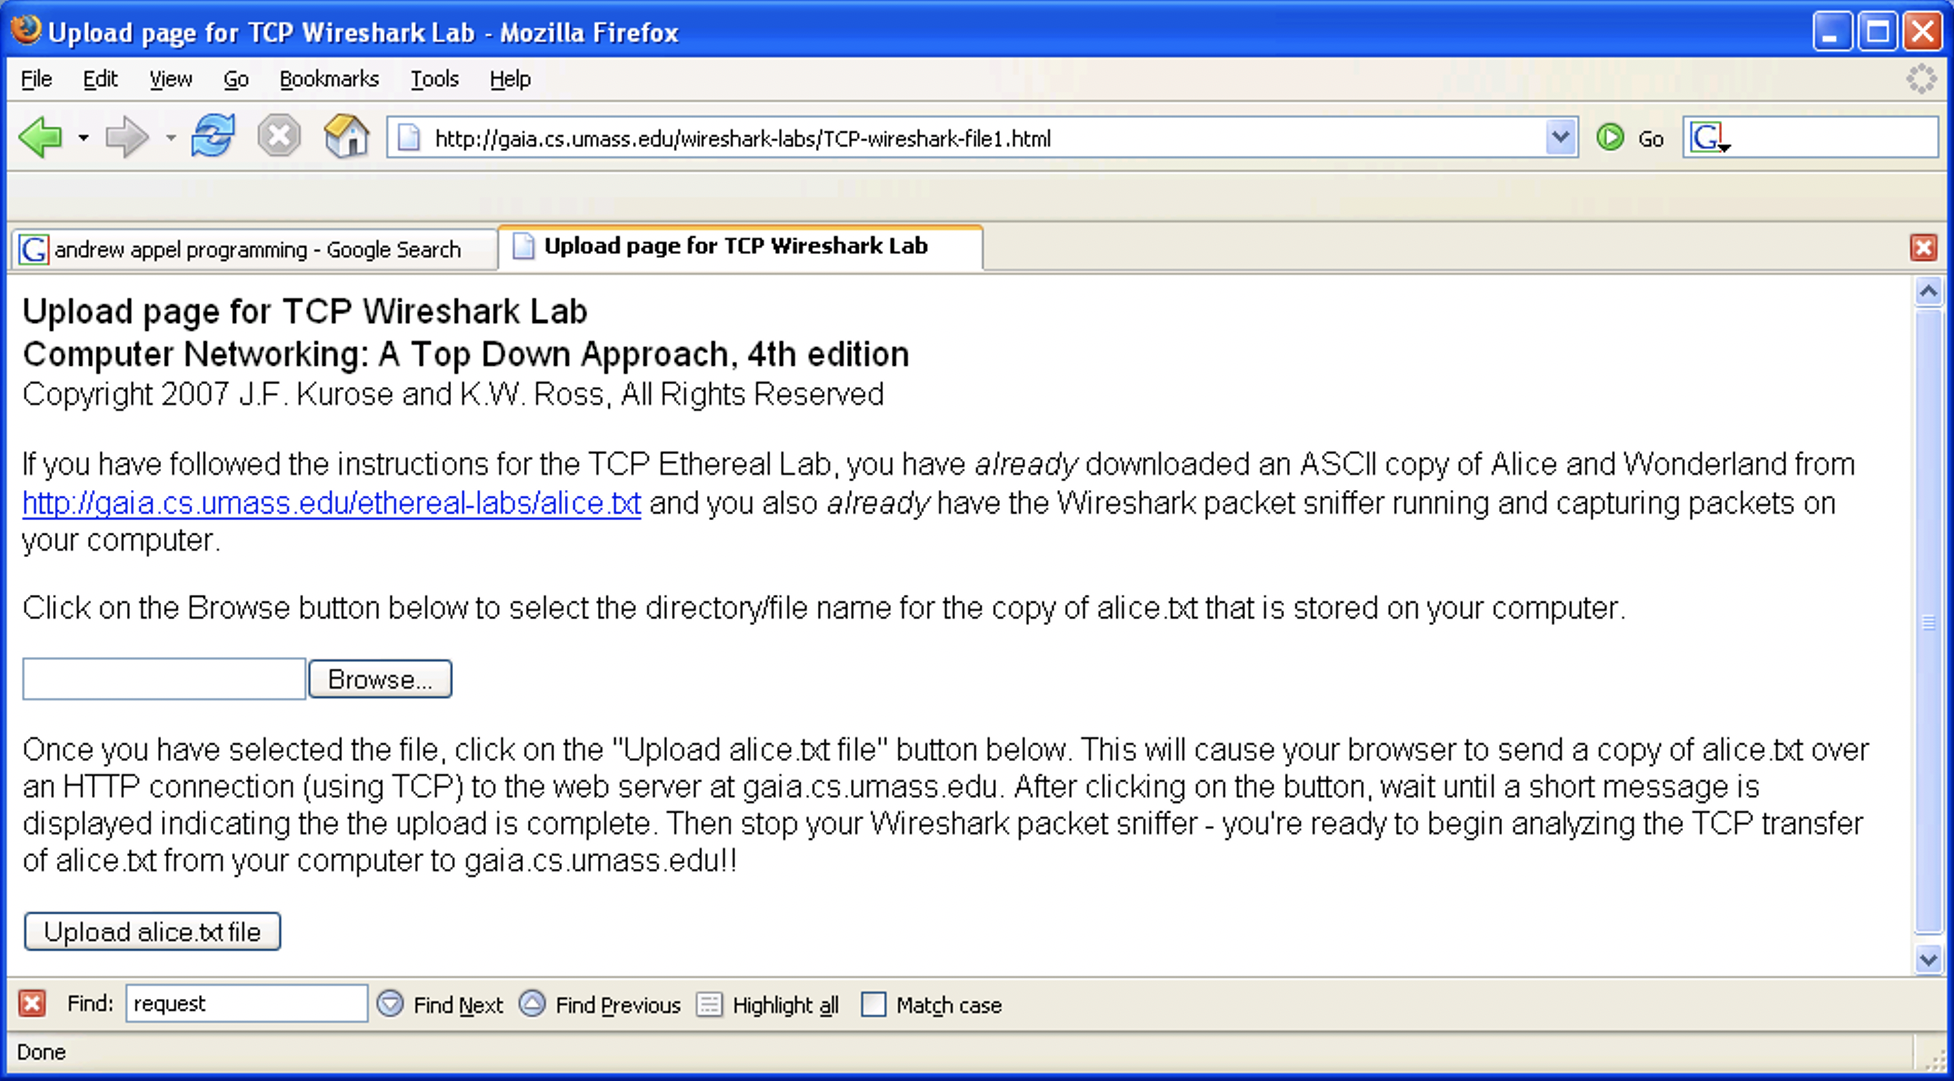

In [2]:
from IPython.display import Image
Image(filename="alice1.png")

* Use the Browsebutton in this form to enter the name of the file (full path name) on your computer containing Alice in Wonderland (or do so manually). Don’t yet press the “Upload alice.txt file” button.
* Now you are about to capture your network packets. I would recommend close down all of your browsers and programs that uses any network protocols. At the end you will need to upload (git push) what you have captured and you wouldn't necessarily want to include any other network activity besides uploading the alice file. (Or you can use a filter to filter out your browser interaction with gaia.cs.umass.edu by specifying host in your filter.) 
* Now start up Wireshark and begin packet capture (Capture->Start) and then press OK on the Wireshark Packet Capture Options screen (we’ll not need to select any options here).
* Returning to your browser, press the “Upload alice.txt file” button to upload the file to the gaia.cs.umass.edu server.  Once the file has been uploaded, a short congratulations message will be displayed in your browser window.
* Stop Wireshark packet capture. Your Wireshark window should look similar to the window shown below.

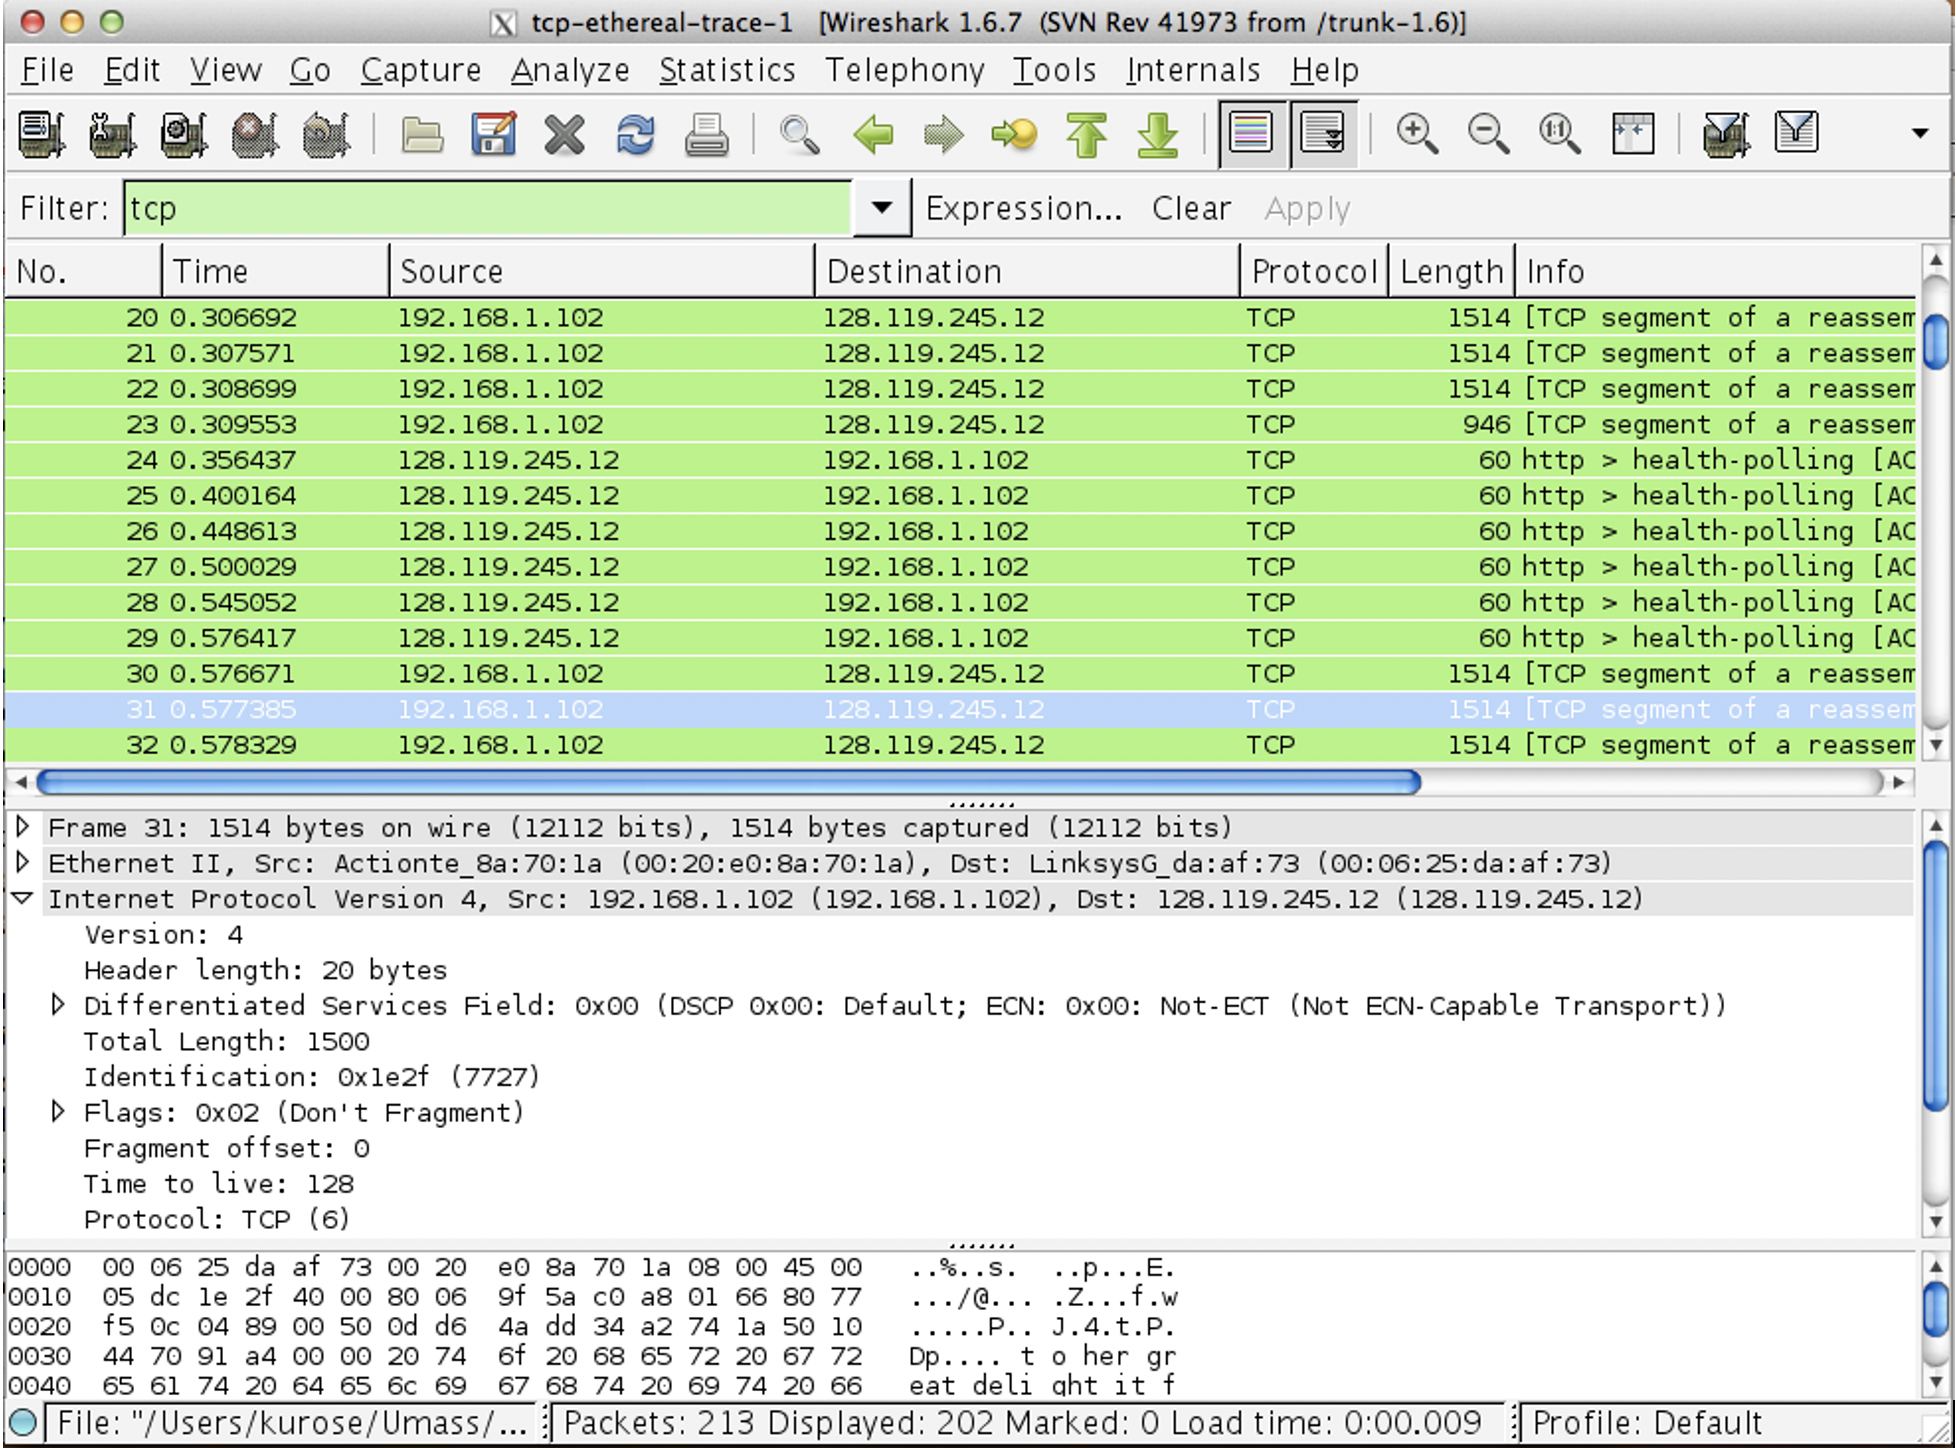

In [3]:
from IPython.display import Image
Image(filename="alice2.png")

Save this trace as Wireshark/tcpdump with a filename "MY_ALICE". It will create a file named "MY_ALICE.pcap" Git add this file into this repository and commit and push.


### A first look at the captured trace
Before analyzing the behavior of the TCP connection in detail, let’s take a high level view of the trace. 
* First, filter the packets displayed in the Wireshark window by entering “tcp” (lowercase, no quotes, and don’t forget to press return after entering!) into the display filter specification window towards the top of the Wireshark window. 

What you should see is series of TCP and HTTP messages between your computer and gaia.cs.umass.edu.  You should see the initial three-way handshake containing a SYN message. You should see an HTTP POST message.  Depending on the version of Wireshark you are using, you might seea series of “HTTP Continuation” messages being sent from your computer to gaia.cs.umass.edu.  Recall from our discussion in the earlier HTTP Wireshark lab, that is no such thing as an HTTP Continuation message –this is Wireshark’s way of indicating that there are multiple TCP segments being used to carry a single HTTP message. In more recent versions of Wireshark, you’ll see “TCP segment of a reassembled PDU” in the Info column of the Wireshark display to indicate that this TCP segment contained data that belonged to an upper layer protocol message (in our case here, HTTP). You should also see TCP ACK segments being returned from gaia.cs.umass.edu to your computer.

## Part 2: Hands-on Questions

### How to Answer Hands-on Questions

Whenever possible, for answering a question you should include a printout of the packet(s) within the trace that you used to answer the question asked.  Annotate the printout to explain your answer. 

* To print a packet, use File->Print, choose Selected packet only, choose Packet summary line, and select the minimum amount of packet detail that you need to answer the question.

* Annotate means <mark>highlighting</mark> where in the printout you've round the answer and add some text noting what you found in what you've highlighted. You can also use different colors <span style="background-color: orange">Orange highlight</span>, <span style="background-color: tomato">Red highlight</span>, etc.)


Answer Q1-Q3 from the trace that you've collected in Part 1.

Q1. What is the IP address and TCP port number used by your client computer (source) to transfer the file to gaia.cs.umass.edu? 

**Put your answer in the cell below**

Q2. What is the IP address and TCP port number used by gaia.cs.umass.edu to receive the file.

**Put your answer in the cell below**

Q3. What is the IP address and TCP port number used by your client computer (source) to transfer the file to gaia.cs.umass.edu?

**Put your answer in the cell below**

### Using Pre-collected Trace

You may close your own trace from Wireshark. Now, open a pre-captured packet file named "tcp-ethereal-trace-1" in this repository with Wireshark. You will answer Q4-Q13 using this pre-captured trace. Since this lab is about TCP rather than HTTP, let’s change Wireshark’s “listing of captured packets” window so that it shows information about the TCP segments containing the HTTP messages, rather than about the HTTP messages. To have Wireshark do this, select Analyze->Enabled Protocols.  Then uncheck the HTTP box and select OK.  You should now see a Wireshark window that looks like:

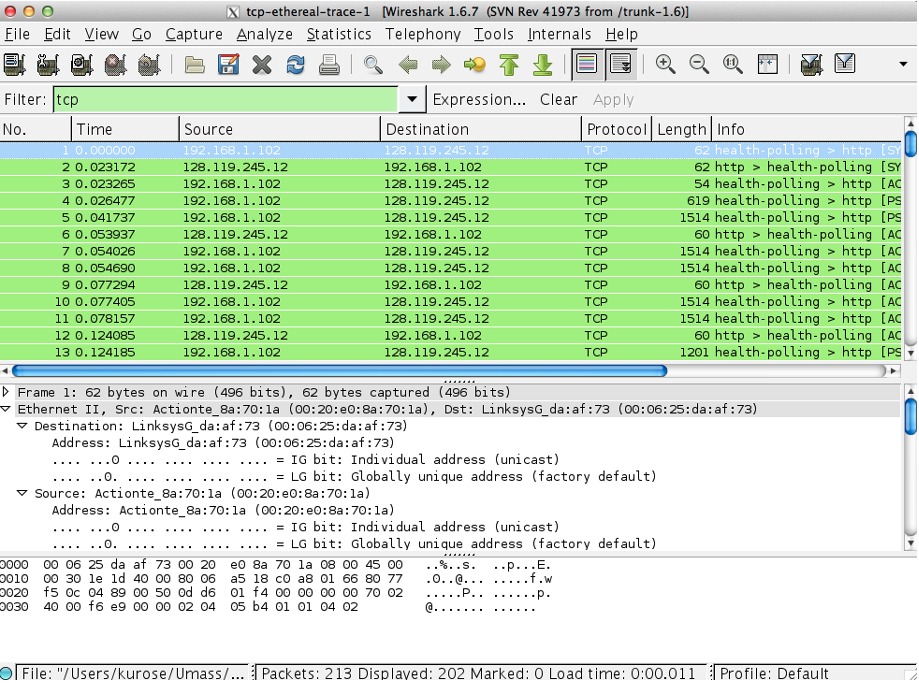

In [5]:
from IPython.display import Image
Image(filename="alice3.png")

This is what we’re looking for - a series of TCP segments sent between your computer and gaia.cs.umass.edu.  We will use this packet trace tcp-ethereal-trace-1 to study TCP behavior in the rest of this lab. 

### TCP Basics

Q4. TCP SYN Segment. 

* Q4-1: What is the sequence number of the TCP SYN segment that is used to initiate the TCP connection between the client computer and gaia.cs.umass.edu?  
* Q4-2: What is it in the segment that identifies the segment as a SYN segment?

**Put your answer in the cell below**

Q5. TCP SYNACK Segment.

* Q5-1: What is the sequence number of the SYNACK segment sent by gaia.cs.umass.edu to the client computer in reply to the SYN?  
* Q5-2: What is the value of the Acknowledgement field in the SYNACK segment?  
* Q5-3: How did gaia.cs.umass.edu determine that value? 
* Q5-4: What is it in the segment that identifies the segment as a SYNACK segment?

**Put your answer in the cell below**

Q6. What is the sequence number of the TCP segment containing the HTTP POST command?  Note that in order to find the POST command, you’ll need to dig into the packet content field at the bottom of the Wireshark window, looking for a segment with a “POST” within its DATA field.

**Put your answer in the cell below**

Q7. Consider the TCP segment containing the HTTP POST as the first segment in the TCP connection.

* Q7-1: What are the sequence numbers of the first six segments in the TCP connection (including the segment containing the HTTP POST)? 
* Q7-2: At what time was each segment sent? When was the ACK for each segment received? 
* Q7-3: Given the difference between when each TCP segment was sent, and when its acknowledgement was received, what is the RTT value for each of the six segments? 
* Q7-4: What is the EstimatedRTT value (see Section 3.5.3 in text) after the receipt of each ACK? Assume that the value of the EstimatedRTT is equal to the measured RTT for the first segment, and then is computed using the EstimatedRTT equation on Section 3.5.3 in text for all subsequent segments.

Note: Wireshark has a nice feature that allows you to plot the RTT for each of the TCP segments sent.  Select a TCP segment in the “listing of captured packets” window that is being sent from the client to the gaia.cs.umass.edu server.  Then select: Statistics->TCP Stream Graph->Round Trip Time Graph.

**Put your answer in the cell below**

Q8. What is the length of each of the first six TCP segments?

Note: The TCP segments in the tcp-ethereal-trace-1 trace file are all less that 1460 bytes.  This is because the computer on which the trace was gathered has an Ethernet card that limits the length of the maximum IP packet to 1500 bytes (40 bytes of TCP/IP header data and 1460 bytes of TCP payload).  This 1500 byte value is the standard maximum length allowed by Ethernet.  

**Put your answer in the cell below**

Q9. Receive window.

* Q9-1: What is the minimum amount of available buffer space advertised at the received for the entire trace?  
* Q9-2: Does the lack of receiver buffer space ever throttle the sender?

**Put your answer in the cell below**

Q10. TCP Retransmission.

* Q10-1: Are there any retransmitted segments in the trace file? 
* Q10-2: What did you check for (in the trace) in order to answer this question?

**Put your answer in the cell below**

Q11. TCK ACK

* Q11-1: How much data does the receiver typically acknowledge in an ACK?  
* Q11-2: Can you identify cases where the receiver is ACKing every other received segment (see Table 3.2 in the text).

**Put your answer in the cell below**

Q12. What is the throughput (bytes transferred per unit time) for the TCP connection?  Explain how you calculated this value.

**Put your answer in the cell below**

### TCP Congestion Control in Action

Let’s now examine the amount of data sent per unit time from the client to the server.  Rather than (tediously!) calculating this from the raw data in the Wireshark window, we’ll use one of Wireshark’s TCP graphing utilities - Time-Sequence-Graph(Stevens) - to plot out data.

* Select a TCP segment in the Wireshark’s “listing of captured-packets” window. Then select the menu : Statistics->TCP Stream Graph-> Time-Sequence-Graph(Stevens).  

You should see a plot that looks similar to the following plot:


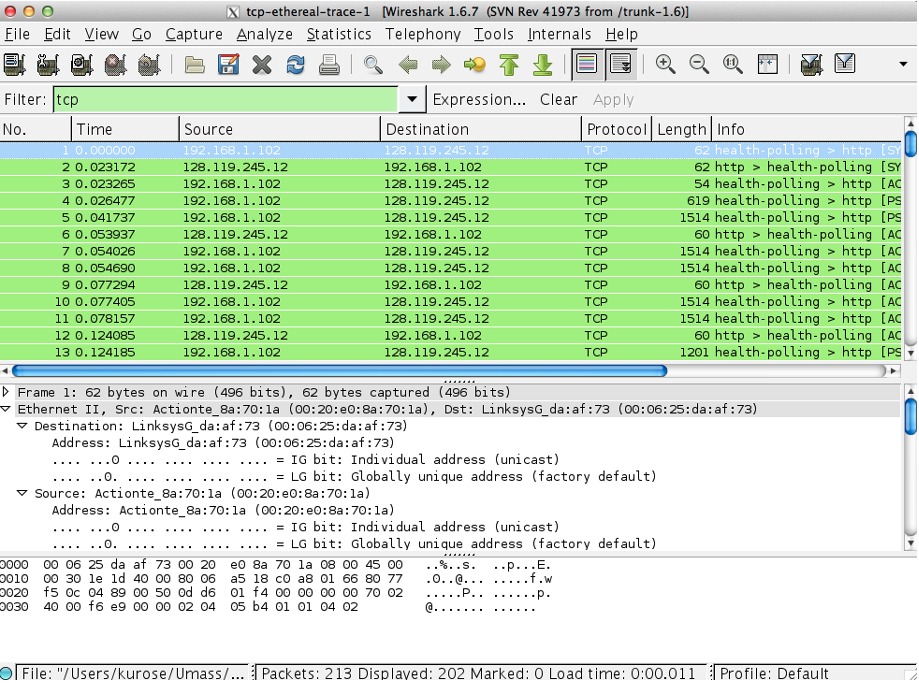

In [6]:
from IPython.display import Image
Image(filename="alice3.png")

Here, each dot represents a TCP segment sent, plotting the sequence number of the segment versus the time at which it was sent. Note that a set of dots stacked above each other represents a series of packets that were sent back-to-back by the sender. Now answer the following questions.

Q13. Use the Time-Sequence-Graph (Stevens) plotting tool to view the sequence number versus time plot of segments being sent from the client to the gaia.cs.umass.edu server.  

* Q13-1: Can you identify where TCP’s slowstart phase begins and ends, and where congestion avoidance takes over? 
* Q13-2: Comment on ways in which the measured data differs from the idealized behavior of TCP that we’ve studied in the text.

**Put your answer in the cell below**

Q14. Generate Time-Sequence-Graph (Stevens) using your own trace collected in Part 1 here. Add the image file to this repository and change the filename in below cell and uncomment below code. You can execute the cell with "Run -> Selected Cell." 

In [8]:
##from IPython.display import Image
##Image(filename="YOUR OWN IMAGE FILENAME WITH EXTENSION")

Q15. Based on above figure in Q14, can you identify where TCP's slowstart phase begins and ends, and where congestion avoidance takes over?

**Put your answer in the cell below**

## Part 3: Submission

Note: Submission instruction has changed from hands-on 1. Please follow the steps below to submit. 

* Save this notebook: "File" -> "Save Notebook"
* Export this notebook to html: "File" -> "Export Notebook As" -> "html" 
* Submit the html to Canvas
* In addition, push the updated notebook to your Github classroom repository (Make sure you've also pushed your own trace file collected in Part 1 as well as the image from Q14)